In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pesticides = pd.read_csv('/content/drive/MyDrive/1678785463852_Crop Yield Prediction Data/Crop Yield Prediction Data/pesticides.csv')

In [4]:
rainfall = pd.read_csv('/content/drive/MyDrive/1678785463852_Crop Yield Prediction Data/Crop Yield Prediction Data/rainfall.csv')

In [5]:
temp = pd.read_csv('/content/drive/MyDrive/1678785463852_Crop Yield Prediction Data/Crop Yield Prediction Data/temp.csv')

In [6]:
Yield = pd.read_csv('/content/drive/MyDrive/1678785463852_Crop Yield Prediction Data/Crop Yield Prediction Data/yield.csv')

In [7]:
pesticides.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [8]:
pesticides.shape

(4349, 7)

In [9]:
pesticides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


In [10]:
pesticides.nunique()

Domain        1
Area        168
Element       1
Item          1
Year         27
Unit          1
Value      2825
dtype: int64

In [11]:
pesticides = pesticides.rename(columns={'Value':'value_tonnes'})

In [12]:
pesticides = pesticides.drop(['Domain','Element','Item','Unit'],axis=1)

In [13]:
pesticides.nunique()

Area             168
Year              27
value_tonnes    2825
dtype: int64

In [14]:
pesticides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          4349 non-null   object 
 1   Year          4349 non-null   int64  
 2   value_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 102.1+ KB


In [15]:
pesticides.head()

,Area,Year,value_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [16]:
pesticides.columns

Index(['Area', 'Year', 'value_tonnes'], dtype='object')

In [17]:
rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [18]:
rainfall.tail()

,Area,Year,average_rain_fall_mm_per_year
6722,Zimbabwe,2013,657
6723,Zimbabwe,2014,657
6724,Zimbabwe,2015,657
6725,Zimbabwe,2016,657
6726,Zimbabwe,2017,657


In [19]:
rainfall.shape

(6727, 3)

In [20]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [21]:
rainfall.nunique()

 Area                            217
Year                              31
average_rain_fall_mm_per_year    173
dtype: int64

In [22]:
rainfall['average_rain_fall_mm_per_year'] = pd.to_numeric(rainfall['average_rain_fall_mm_per_year'],errors = 'coerce')
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Area                          6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [23]:
rainfall['average_rain_fall_mm_per_year'].fillna(rainfall['average_rain_fall_mm_per_year'].median(), inplace=True)

In [24]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Area                          6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  6727 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [25]:
rainfall.columns

Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')

In [26]:
rainfall.describe()

,Year,average_rain_fall_mm_per_year
count,6727.000000,6727.000000
mean,2001.354839,1111.438680
std,9.530114,740.174992
min,1985.000000,51.000000
25%,1993.000000,589.000000
50%,2001.000000,1010.000000
75%,2010.000000,1543.000000
max,2017.000000,3240.000000


In [27]:
rainfall = rainfall.rename(columns={' Area':'Area'})

In [28]:
temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [29]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [30]:
temp.isnull().sum()

year           0
country        0
avg_temp    2547
dtype: int64

In [31]:
temp.shape

(71311, 3)

In [32]:
temp['avg_temp'].fillna(temp['avg_temp'].median(), inplace=True)

In [33]:
temp.isnull().sum()

year        0
country     0
avg_temp    0
dtype: int64

In [34]:
temp.nunique()

year         271
country      137
avg_temp    3303
dtype: int64

In [35]:
temp.columns

Index(['year', 'country', 'avg_temp'], dtype='object')

In [36]:
temp = temp.rename(columns={'year':'Year'})

In [37]:
temp = temp.rename(columns={'country':'Area'})

In [38]:
temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,16.14
4,1853,Côte D'Ivoire,16.14


In [39]:
Yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [40]:
Yield.tail()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826
56716,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2016,2016,hg/ha,18294


In [41]:
Yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


In [42]:
Yield.shape

(56717, 12)

In [43]:
 Yield = Yield.drop(['Domain Code','Domain','Element Code','Element','Year Code','Unit','Area Code','Item Code'],axis=1)

In [44]:
Yield = Yield.rename(columns={'Value':'value_hg/ha'})

In [45]:
Yield.head()

,Area,Item,Year,value_hg/ha
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [46]:
Yield.tail()

,Area,Item,Year,value_hg/ha
56712,Zimbabwe,Wheat,2012,24420
56713,Zimbabwe,Wheat,2013,22888
56714,Zimbabwe,Wheat,2014,21357
56715,Zimbabwe,Wheat,2015,19826
56716,Zimbabwe,Wheat,2016,18294


In [47]:
Yield.columns

Index(['Area', 'Item', 'Year', 'value_hg/ha'], dtype='object')

In [48]:
S = pd.merge(pesticides,rainfall,on=['Area','Year'],how='inner')

In [49]:
S

,Area,Year,value_tonnes,average_rain_fall_mm_per_year
0,Albania,1990,121.00,1485.0
1,Albania,1991,121.00,1485.0
2,Albania,1992,121.00,1485.0
3,Albania,1993,121.00,1485.0
4,Albania,1994,201.00,1485.0
...,...,...,...,...
3497,Zimbabwe,2012,3375.53,657.0
3498,Zimbabwe,2013,2550.07,657.0
3499,Zimbabwe,2014,2185.07,657.0
3500,Zimbabwe,2015,2185.07,657.0


In [50]:
P=pd.merge(temp,Yield,on=['Area','Year'],how='inner')

In [51]:
P

,Year,Area,avg_temp,Item,value_hg/ha
0,1975,United Arab Emirates,26.49,Potatoes,147368
1,1976,United Arab Emirates,26.43,Potatoes,168000
2,1977,United Arab Emirates,27.43,Potatoes,205405
3,1977,United Arab Emirates,27.43,Wheat,11667
4,1978,United Arab Emirates,26.89,Potatoes,183761
...,...,...,...,...,...
84854,2013,Croatia,11.58,Maize,65000
84855,2013,Croatia,11.58,Potatoes,158785
84856,2013,Croatia,11.58,Sorghum,50203
84857,2013,Croatia,11.58,Soybeans,23606


In [52]:
df_train = pd.merge(S,P,on=['Area','Year'],how='inner')

In [53]:
df_train

,Area,Year,value_tonnes,average_rain_fall_mm_per_year,avg_temp,Item,value_hg/ha
0,Albania,1990,121.00,1485.0,16.37,Maize,36613
1,Albania,1990,121.00,1485.0,16.37,Potatoes,66667
2,Albania,1990,121.00,1485.0,16.37,"Rice, paddy",23333
3,Albania,1990,121.00,1485.0,16.37,Sorghum,12500
4,Albania,1990,121.00,1485.0,16.37,Soybeans,7000
...,...,...,...,...,...,...,...
28243,Zimbabwe,2013,2550.07,657.0,19.76,"Rice, paddy",22581
28244,Zimbabwe,2013,2550.07,657.0,19.76,Sorghum,3066
28245,Zimbabwe,2013,2550.07,657.0,19.76,Soybeans,13142
28246,Zimbabwe,2013,2550.07,657.0,19.76,Sweet potatoes,22222


In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28248 entries, 0 to 28247
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28248 non-null  object 
 1   Year                           28248 non-null  int64  
 2   value_tonnes                   28248 non-null  float64
 3   average_rain_fall_mm_per_year  28248 non-null  float64
 4   avg_temp                       28248 non-null  float64
 5   Item                           28248 non-null  object 
 6   value_hg/ha                    28248 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [55]:
df_train.describe()

,Year,value_tonnes,average_rain_fall_mm_per_year,avg_temp,value_hg/ha
count,28248.000000,28248.000000,28248.000000,28248.000000,28248.000000
mean,2001.541950,37069.136973,1149.026444,20.543722,77047.863282
std,7.052997,59954.787836,709.739653,6.311828,84950.194454
min,1990.000000,0.040000,51.000000,1.300000,50.000000
25%,1995.000000,1695.710000,593.000000,16.710000,19918.750000
50%,2001.000000,17517.760000,1083.000000,21.510000,38295.000000
75%,2008.000000,48687.880000,1668.000000,26.000000,104598.250000
max,2013.000000,367778.000000,3240.000000,30.650000,501412.000000


In [56]:
df_train.dtypes

Area                              object
Year                               int64
value_tonnes                     float64
average_rain_fall_mm_per_year    float64
avg_temp                         float64
Item                              object
value_hg/ha                        int64
dtype: object

In [ ]:
plt.scatter(x= 'avg_temp' , y= 'value_hg/ha', data = df_train)
plt.show()

In [ ]:
plt.scatter(x = 'average_rain_fall_mm_per_year' , y= 'value_hg/ha' , data = df_train)
plt.show()

In [ ]:
sns.heatmap(df_train.corr())
plt.figure(figsize=(8, 8))
plt.show()

In [57]:
df_train_ohe = pd.get_dummies(df_train, columns=['Area',"Item"])
df_train_ohe.head()

,Year,value_tonnes,average_rain_fall_mm_per_year,avg_temp,value_hg/ha,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,121.0,1485.0,16.37,36613,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,121.0,1485.0,16.37,66667,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,121.0,1485.0,16.37,23333,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,121.0,1485.0,16.37,12500,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,121.0,1485.0,16.37,7000,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


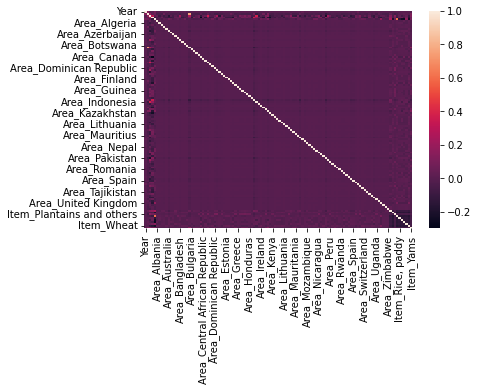

In [58]:
sns.heatmap(df_train_ohe.corr())
plt.show()

In [59]:
# Define the columns to scale
cols = ['Year','average_rain_fall_mm_per_year','value_tonnes','avg_temp']

# Calculate the mean and standard deviation for each column
means = df_train_ohe[cols].mean()
stds = df_train_ohe[cols].std()

# Subtract the mean and divide by the standard deviation for each value in each column
for col in cols:
    df_train_ohe[col] = (df_train_ohe[col] - means[col]) / stds[col]

# Print the first few rows of the scaled DataFrame
print(df_train_ohe.head())


      Year  value_tonnes  average_rain_fall_mm_per_year  avg_temp  \
0 -1.63646     -0.616267                       0.473376 -0.661254   
1 -1.63646     -0.616267                       0.473376 -0.661254   
2 -1.63646     -0.616267                       0.473376 -0.661254   
3 -1.63646     -0.616267                       0.473376 -0.661254   
4 -1.63646     -0.616267                       0.473376 -0.661254   

   value_hg/ha  Area_Albania  Area_Algeria  Area_Angola  Area_Argentina  \
0        36613             1             0            0               0   
1        66667             1             0            0               0   
2        23333             1             0            0               0   
3        12500             1             0            0               0   
4         7000             1             0            0               0   

   Area_Armenia  ...  Item_Cassava  Item_Maize  Item_Plantains and others  \
0             0  ...             0           1           

In [60]:
#y = df_train_ohe['value_hg/ha']
#X= df_train_ohe.drop('value_hg/ha',axis=1)
#X.head()

In [61]:
class RidgeRegression:

    # initiating the hyperparameters
    def __init__(self, lambda_parameter, no_of_iterations, learning_rate):
        self.lambda_parameter = lambda_parameter
        self.no_of_iterations = no_of_iterations
        self.learning_rate = learning_rate
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = np.mean(y)
        for i in range(self.no_of_iterations):
            coef_w = np.copy(self.w)
            for j in range(X.shape[1]):
                X_j = X[:,j]
                X_not_j = np.delete(X, j, axis=1)
                y_pred = self.b + X_not_j.dot(self.w[np.arange(X.shape[1]) != j])
                residual_j = X_j.dot(y - y_pred)
                if residual_j < -self.lambda_parameter/2:
                    self.w[j] = (residual_j + self.lambda_parameter/2) / np.sum(X_j**2)
                elif residual_j > self.lambda_parameter/2:
                    self.w[j] = (residual_j - self.lambda_parameter/2) / np.sum(X_j**2)
                else:
                    self.w[j] = 0
            if np.linalg.norm(self.w - coef_w) < self.learning_rate:
                break
    # Predicting the Target variable
    def predict(self, X):
        return self.b + X.dot(self.w)
    # R-squared coefficient to evaluate the model
    def r_squared(self, X, y):
        y_pred = self.predict(X)
        SS_res = np.sum((y - y_pred)**2)
        SS_tot = np.sum((y - np.mean(y))**2)
        return 1 - (SS_res / SS_tot)
    # Cross Validation score for K-fold cross validation
    def cross_val_score(self, X, y, k=5):
        n = X.shape[0]
        idx = np.arange(n)
        np.random.shuffle(idx)
        X_folds = np.array_split(X[idx], k)
        y_folds = np.array_split(y[idx], k)
        scores = []
        for i in range(k):
            X_train = np.vstack(X_folds[:i] + X_folds[i+1:])
            y_train = np.concatenate(y_folds[:i] + y_folds[i+1:])
            X_valid = X_folds[i]
            y_valid = y_folds[i]
            self.fit(X_train, y_train)
            score = self.r_squared(X_valid, y_valid)
            scores.append(score)
        return scores
    # Grid search to tune the hyperparameters
    def grid_search(self, X, y, param_grid, k=5):
        best_score = -np.inf
        best_params = None
        for params in param_grid:
            self.lambda_parameter = params['lambda']
            self.no_of_iterations = params['iterations']
            self.learning_rate = params['learning_rate']
            scores = self.cross_val_score(X, y, k=k)
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = params
        self.lambda_parameter = best_params['lambda']
        self.no_of_iterations = best_params['iterations']
        self.learning_rate = best_params['learning_rate']
    # Get coefficients of the model
    def get_coefficients(self):
        return self.w, self.b


In [62]:
from sklearn.model_selection import train_test_split

X = df_train_ohe.drop('value_hg/ha', axis=1)
y = df_train_ohe['value_hg/ha']
     
Ridge_model = RidgeRegression(lambda_parameter=0.1, no_of_iterations=1000, learning_rate=0.001)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Ridge_model.fit(X_train.values, y_train)

In [ ]:
param_grid = {'lambda': [0.001, 0.01, 0.1, 1, 10],
              'iterations': [100, 500, 1000],
              'learning_rate': [0.001, 0.01, 0.1]}
for params in param_grid:
    lambda_parameter = params[0]
    no_of_iterations = params[1]
    learning_rate = params[2]
             
Ridge_model = RidgeRegression(lambda_parameter=0.1, no_of_iterations=1000, learning_rate=0.01)

# Print the best hyperparameters and the corresponding cross-validation score
print('Cross-validation score:', np.mean(Ridge_model.cross_val_score(X_train.values, y_train.values, k=5)))
print('Best hyperparameters:', Ridge_model.lambda_parameter, Ridge_model.no_of_iterations, Ridge_model.learning_rate)


In [ ]:
y_pred = Ridge_model.predict(X_test.values)
print(y_pred)

In [ ]:
y_pred = Ridge_model.predict(X_test.values)

mse = ((y_test.values - y_pred) ** 2).mean()
rmse = np.sqrt(mse)
mae = np.abs(y_test.values - y_pred).mean()
ssr = ((y_pred - y_test.values) ** 2).sum()
sst = ((y_test.values - y_test.values.mean()) ** 2).sum()
r_squared = 1 - (ssr / sst)

# Print the error metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)